# Proyecto: Community Detection Problem

Para comenzar vamos a comprobar que seamos capaces de importar los módulos de Python que necesitaremos.
La finalidad de este cuaderno será hacer una <i>puesta a punto</i>: instalar los módulos, y poder cargar los datos NIPS.
Finalmente, a partir de los datos de NIPS y utilizando los módulos NetworkX y Community, mostraremos distintos gráficos sobre los autores y su colaboración.

Importa las siguientes bibliotecas:

In [1]:
# SQL
import sqlite3

# Pandas
import pandas as pd

# Graph
import community
import networkx as nx

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Combinations
import itertools

### Construcción del grafo NIPS

Los datos publicados en la conferencia NIPS durante las últimas décadas se encuentran en el archivo <b>database.sqlite</b>.
Usando el siguiente código, deberíamos poder extraer los datos en una tabla de tres columnas.
En las columnas debe aparecer el ID del artículo, el ID del autor y el nombre del autor.

In [2]:
# Get data
connect = sqlite3.connect('./data/database.sqlite')
query = """
SELECT pa.paper_id, pa.author_id, a.name
FROM paper_authors AS pa JOIN papers AS p ON pa.paper_id = p.id
JOIN authors as a ON pa.author_id = a.id
WHERE p.Year BETWEEN '2014' AND '2015'
"""
df = pd.read_sql(query, connect)

# Have a look at data
df.head(10)

,paper_id,author_id,name
0,5239,5654,Krikamol Muandet
1,5239,7140,Bharath Sriperumbudur
2,5239,1472,Bernhard Sch?lkopf
3,5591,5209,Yichuan Zhang
4,5591,7542,Charles Sutton
5,5597,7649,Mu Li
6,5597,7650,David G. Andersen
7,5597,6548,Alexander J. Smola
8,5597,2847,Kai Yu
9,5299,7226,Halid Z. Yerebakan


¡Eureka! Ya tenemos los datos.
Ahora construiremos el grafo de colaboración, para esto usaremos el módulo NetworkX.
En ese grafo tendremos un nodo para cada autor, y si ha habido colaboración entre dos autores (han escrito un artículo juntos), entonces habrá también un arco entre los nodos correspondientes.
Para reflejar la fuerza de la colaboración (no es lo mismo hacer una colaboración, que 100) los arcos tendrán un peso, que indicará el número de colaboraciones.
Para saber que has creado el gráfico correctamente, con los datos entre 2014 y 2015, deberías obtener un gráfico con 1843 nodos y 3215 arcos.

In [3]:
# Initialize graph
G = nx.Graph()

# Transform
for p, a in df.groupby('paper_id')['name']: # a -> nombres de autores que participaron en el mismo paper 
    for u, v in itertools.combinations(a, 2): # u, v -> todas las parejas posibles de autores dentro del paper sin repeción
        if G.has_edge(u, v):
            G[u][v]['weight'] +=1 # si la arista existe (ya habían colaborado antes), incrementa su peso en 1
        else:
            G.add_edge(u, v, weight=1) # si la arista no existe (no habían colaborado antes), la crea y le da un peso de 1
            
# Print graph size
print("Número de autores en el grafo: {}".format(G.number_of_nodes()))
print("Número de aristas en el grafo: {}".format(G.number_of_edges()))

Número de autores en el grafo: 1843
Número de aristas en el grafo: 3215


Finalmente, mostraremos el grafo que hemos construido.
Para ello, utilizaremos el módulo MatPlotLib.

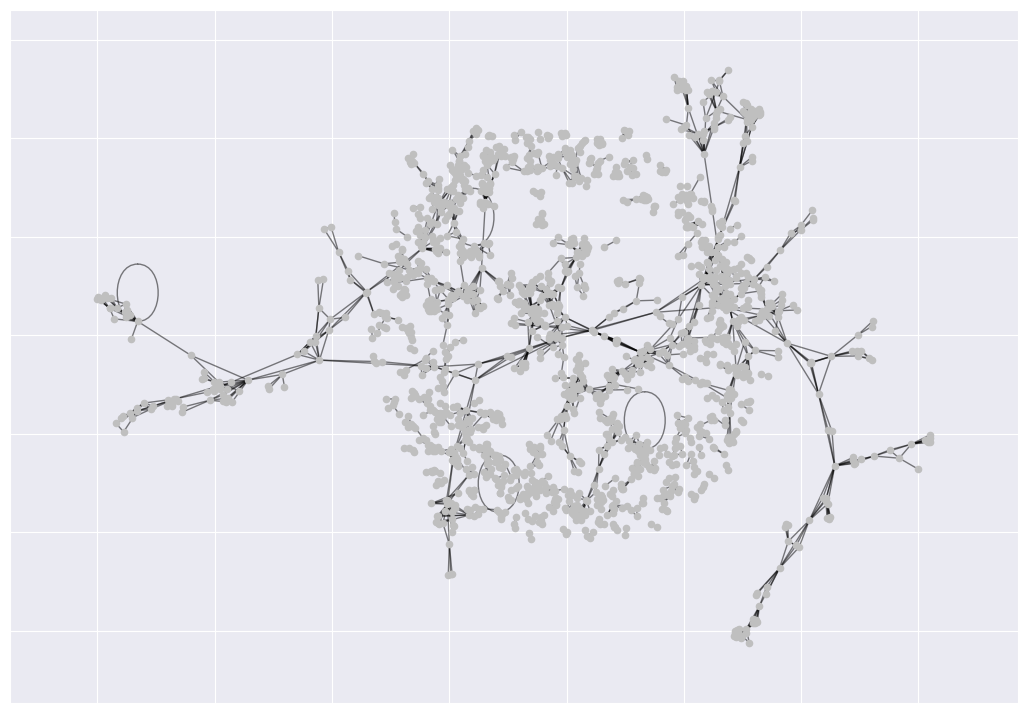

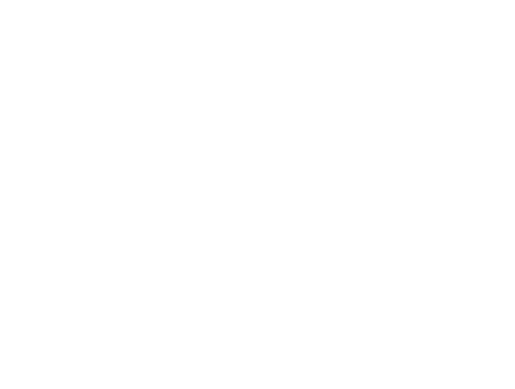

In [4]:
%matplotlib inline

#Draw graph
plt.figure(figsize=(13, 9))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size = 20, node_color='0.75')
nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
plt.show()

plt.axis('off')
plt.show()

A continuación, crea las siguientes funciones utilizando como base el código anterior:

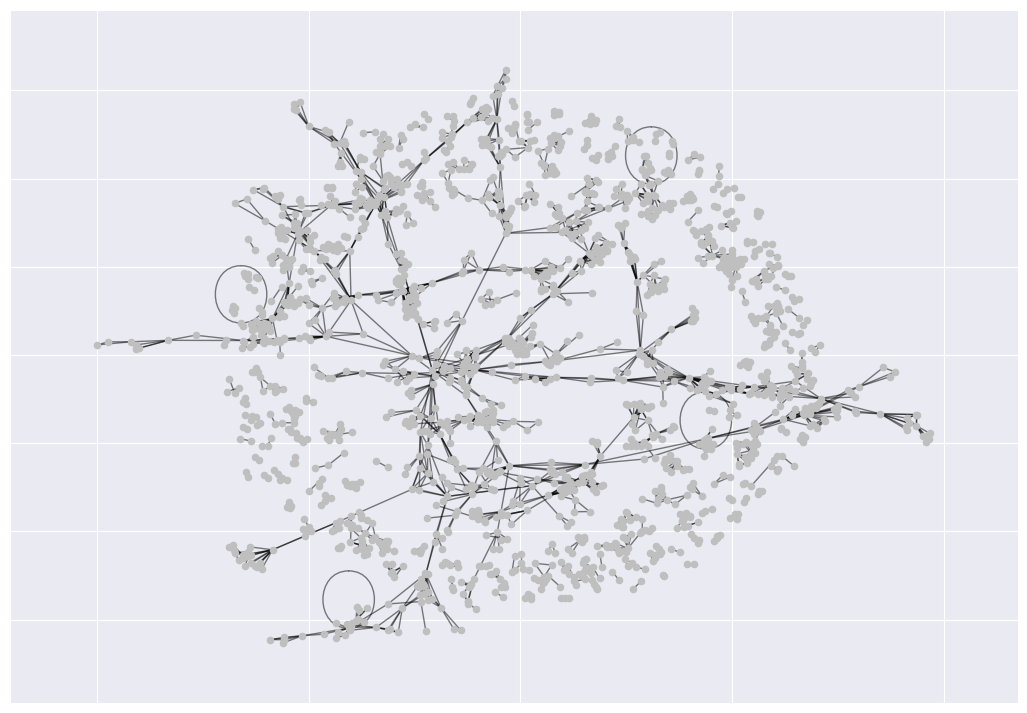

In [5]:
# SQL
import sqlite3

# Pandas
import pandas as pd

# Graph
import community
import networkx as nx

# Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Combinations
import itertools

def crear_grafo():

    # Get data
    connect = sqlite3.connect('./data/database.sqlite')
    query = """
    SELECT pa.paper_id, pa.author_id, a.name
    FROM paper_authors AS pa JOIN papers AS p ON pa.paper_id = p.id
    JOIN authors as a ON pa.author_id = a.id
    WHERE p.Year BETWEEN '2014' AND '2015'
    """
    df = pd.read_sql(query, connect)

    # Have a look at data
    df.head(10)
    
    # Initialize graph
    G = nx.Graph()

    # Transform
    for p, a in df.groupby('paper_id')['name']: # a -> nombres de autores que participaron en el mismo paper 
        for u, v in itertools.combinations(a, 2): # u, v -> todas las parejas posibles de autores dentro del paper sin repeción
            if G.has_edge(u, v):
                G[u][v]['weight'] +=1 # si la arista existe (ya habían colaborado antes), incrementa su peso en 1
            else:
                G.add_edge(u, v, weight=1) # si la arista no existe (no habían colaborado antes), la crea y le da un peso de 1
    
    return G

def visualizar_grafo(G):

    #Draw graph
    plt.figure(figsize=(13, 9))
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = 20, node_color='0.75')
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=1)
    plt.show()

grafo = crear_grafo()
visualizar_grafo(grafo)